In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)

data=pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [47]:
data.isnull().head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [48]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [49]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

0    7963
1    2037
Name: Exited, dtype: int64


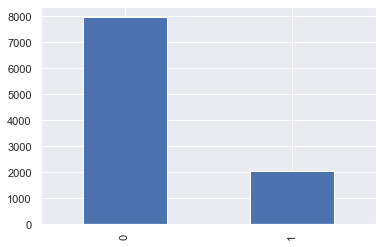

In [50]:
color_wheel={1:"#0392cf",2:"#7bc043"}
colors=data['Exited'].map(lambda x:color_wheel.get(x+1))

print(data.Exited.value_counts())
p=data.Exited.value_counts().plot(kind='bar')

In [51]:
data=data.drop('Surname',axis=1)

In [52]:
data=data.drop("RowNumber",axis=1)
data.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [53]:
data=data.drop('CustomerId',axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:
data.shape

(10000, 11)

In [55]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [56]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [57]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [58]:
#Now make values of gender and geography numeric
df=['Germany','France','Spain']
num=['0','1','2']
for i in range(3):
    data['Geography']=data['Geography'].replace([df[i]],num[i])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,Female,42,2,0.00,1,1,1,101348.88,1
1,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,1,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,1,Female,39,1,0.00,2,0,0,93826.63,0
4,850,2,Female,43,2,125510.82,1,1,1,79084.10,0


In [59]:
data['Gender']=data['Gender'].replace(['Female'],'0')
data['Gender']=data['Gender'].replace(['Male'],'1')
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [60]:
#Now convert geography and gender columns to integer
data['Geography']=pd.to_numeric(data['Geography'])
data['Gender']=pd.to_numeric(data['Gender'])
data.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<AxesSubplot:>

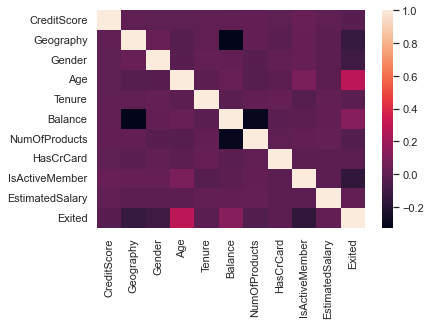

In [61]:
sns.heatmap(data.corr(),fmt='.1g')

In [62]:
data['Exited'].value_counts().unique()

array([7963, 2037], dtype=int64)

In [63]:
x=data.drop('Exited',axis=1)
y=data['Exited']



In [64]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score,precision_score,recall_score


In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [89]:
from sklearn.tree import DecisionTreeClassifier
modeldt = DecisionTreeClassifier()
modeldt.fit(x_train,y_train)



DecisionTreeClassifier()

In [67]:
pred=modeldt.predict(x_test)


In [68]:
print("Accuracy Score:-",accuracy_score(y_test,pred)*100)

print('Precision Score:-',precision_score(y_test,pred)*100)

print('Recall Score:-',recall_score(y_test,pred)*100)


Accuracy Score:- 78.60000000000001
Precision Score:- 48.00936768149883
Recall Score:- 49.87834549878345


In [69]:
from sklearn.ensemble import RandomForestClassifier
rfcmodel=RandomForestClassifier()
rfcmodel.fit(x_train,y_train)

RandomForestClassifier()

In [70]:
predrfc=rfcmodel.predict(x_test)

In [71]:
print("Accuracy Score:-",accuracy_score(y_test,predrfc)*100)

print('Precision Score:-',precision_score(y_test,predrfc)*100)

print('Recall Score:-',recall_score(y_test,predrfc)*100)

Accuracy Score:- 86.55000000000001
Precision Score:- 77.09923664122137
Recall Score:- 49.148418491484186


In [72]:
from sklearn import svm
modelsvm=svm.SVC()
modelsvm.fit(x_train,y_train)

SVC()

In [73]:
predsvc=modelsvm.predict(x_test)

In [74]:
print("Accuracy Score:-",accuracy_score(y_test,predsvc)*100)

Accuracy Score:- 79.45


In [129]:
dt=x_test

In [139]:
dt.loc[len(x_test.index)]=[200,1,1,20,0,3807.86,1,0,1,1112542.58]

In [140]:
dt

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1977,717.0,2.0,1.0,35.0,1.0,0.00,3.0,0.0,0.0,174770.14
3880,677.0,1.0,0.0,72.0,8.0,0.00,2.0,1.0,1.0,153604.44
52,788.0,1.0,0.0,33.0,5.0,0.00,2.0,0.0,0.0,116978.19
2551,537.0,1.0,0.0,53.0,3.0,0.00,1.0,1.0,1.0,91406.62
2246,717.0,2.0,0.0,39.0,6.0,0.00,2.0,1.0,0.0,93275.61
...,...,...,...,...,...,...,...,...,...,...
1169,653.0,1.0,0.0,38.0,8.0,102133.38,1.0,1.0,1.0,166520.96
9929,755.0,0.0,1.0,38.0,4.0,111096.91,1.0,1.0,1.0,19762.88
8486,738.0,0.0,0.0,40.0,6.0,114940.67,2.0,1.0,1.0,194895.57
2000,608.0,2.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58


In [122]:
xgbmodel.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [86]:
from xgboost import XGBClassifier
xgbmodel=XGBClassifier()


xgbmodel.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [125]:
predxgb=xgbmodel.predict(x_test)

In [141]:
p=xgbmodel.predict(dt)

In [142]:
p[-1]

1

In [77]:
print("Accuracy Score:-",accuracy_score(y_test,predxgb)*100)

print('Precision Score:-',precision_score(y_test,predxgb)*100)

print('Recall Score:-',recall_score(y_test,predxgb)*100)

Accuracy Score:- 85.9
Precision Score:- 72.95373665480427
Recall Score:- 49.87834549878345


In [78]:
from sklearn.metrics import classification_report,confusion_matrix

print('Classification Report:-\n',classification_report(y_test,predrfc))


Classification Report:-
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1589
           1       0.77      0.49      0.60       411

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.85      2000



Text(0.5, 1.0, 'Accuracy Score:0.8655')

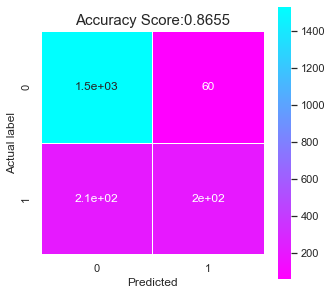

In [79]:
confmat=confusion_matrix(y_test,predrfc)
plt.figure(figsize=(5,5))
sns.heatmap(data=confmat,linewidth=.5,annot=True,square=True,cmap='cool_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted')
astitle='Accuracy Score:{0}'.format(rfcmodel.score(x_test,y_test))
plt.title(astitle,size=15)

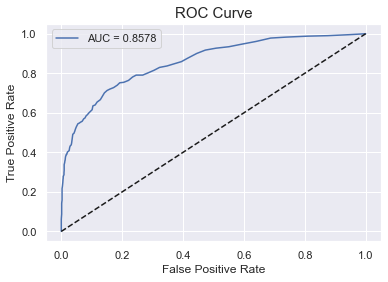

In [80]:
from sklearn.metrics import roc_curve,roc_auc_score
predrfcprob=rfcmodel.predict_proba(x_test)[:][:,1]
data_actual_predicted=pd.concat([pd.DataFrame(np.array(y_test),columns=['y_actual']),pd.DataFrame(predrfcprob,columns=['rfcpredprob'])],axis=1)
data_actual_predicted.index=y_test.index
fpr,tpr,tr=roc_curve(data_actual_predicted['y_actual'],data_actual_predicted['rfcpredprob'])
auc=roc_auc_score(data_actual_predicted['y_actual'],data_actual_predicted['rfcpredprob'])
plt.plot(fpr,tpr,label='AUC = %0.4f'%auc)
plt.plot(fpr,fpr,linestyle='--',color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve',size=15)
plt.legend()

In [81]:
print("Classification Report- \n",classification_report(y_test,predxgb))

Classification Report- 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1589
           1       0.73      0.50      0.59       411

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Text(0.5, 1.0, 'Accuracy Score:0.859')

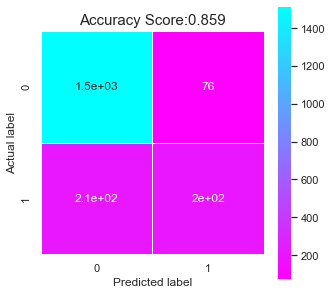

In [82]:
confmatr=confusion_matrix(y_test,predxgb)
plt.figure(figsize=(5,5))
sns.heatmap(data=confmatr,linewidth=.5,annot=True,square=True,cmap='cool_r')
plt.ylabel('Actual label')
plt.xlabel("Predicted label")
all_sample_title="Accuracy Score:{0}".format(xgbmodel.score(x_test,y_test))
plt.title(all_sample_title,size=15)

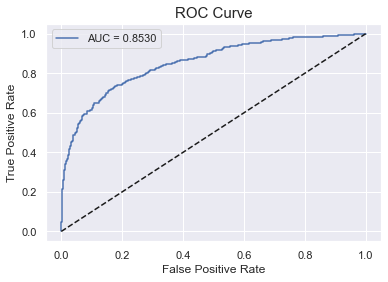

In [83]:
from sklearn.metrics import roc_curve,roc_auc_score
predxgbprob=xgbmodel.predict_proba(x_test)[:][:,1]
data_actual_predicted=pd.concat([pd.DataFrame(np.array(y_test),columns=['y_actual']),pd.DataFrame(predxgbprob,columns=['xgbpredprob'])],axis=1)
data_actual_predicted.index=y_test.index
fpr,tpr,tr=roc_curve(data_actual_predicted['y_actual'],data_actual_predicted['xgbpredprob'])
auc=roc_auc_score(data_actual_predicted['y_actual'],data_actual_predicted['xgbpredprob'])
plt.plot(fpr,tpr,label='AUC = %0.4f'%auc)
plt.plot(fpr,fpr,linestyle='--',color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve',size=15)
plt.legend()